<a href="https://colab.research.google.com/github/Akshay2224/Apparent-Temperature/blob/master/Apparent_Temp_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Apparent Temperature

## What is Apparent Temperature ?
####Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind  speed. The measure is most commonly applied to the perceived outdoor temperature.In simple words ,It is the temperature that it feels like to our body because of other weather variables other than temperature. This is generally higher in case of high humidity.          

##Project Statement

####This project is a programming assignment wherein you have to make an EDA report to analyse the factors affecting the apparent temperature given other weather variables in an hourly manner.

In [0]:
#Importing necessary Libraries
import pandas as pd #used for opening file 
import numpy as np #for linear Algebra
import seaborn as sns #for data visualization
from windrose import WindroseAxes
import matplotlib.pyplot as plt #for data visualization

In [0]:
#Opening a File by read_csv function under pandas library
df=pd.read_csv('https://github.com/Akshay2224/Apparent-Temperature/raw/master/weather_data.csv')

In [0]:
#lets look towards the number of rows and columns in the datset
df.shape

(5999, 12)

####So it looks from the above analysis that we are having 5999 rows and 12 columns

## Data Description
#### The data set contains 6000 entries with 12 columns listing various environment variables and text descriptions. The CSV file includes an hourly/daily  summary for Szeged, Hungary area, between 2006 and 2008. 

### Szeged,Hungary
####Szeged is the third largest city of Hungary, the largest city and regional centre of the Southern Great Plain and the county seat of Csongrád county. The University of Szeged is one of the most distinguished universities in Hungary.Szeged is the third-most-populous city / town of Hungary by population (168,048)
![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Szeged%2C_Tisza_river_bank%2C_with_Mora_Museum%2C_and_the_Theatre_building.jpg/1920px-Szeged%2C_Tisza_river_bank%2C_with_Mora_Museum%2C_and_the_Theatre_building.jpg)

### Attribute Description
#### 1. time -Time at which the observation is recorded
#### 2. summary -It describes the summary of the weather
#### 3. precipType -It describes the form of precipitation
#### 4. temperature -it describes the actual tempertaure that was recorded at that time .It is calculated in degree celsius.
#### 5. apparentTemperature -It describes the apparent temperature that was calculated at that time..It is calculated in degree celsius.
#### 6. humidity -It describes the Humidity.
#### 7. windSpeed-It desribes the windspeed..It is calculated in Kilometres/hour,
#### 8. windBearing- It describes the degree toward which the wind is blowing.
#### 9. visibility-It descibes the distance upto which it is visible by a naked eye.It is calculated in Kilometres.
#### 10.loudCover-It describes the cloud cover.
#### 11. pressure-It describes about the pressure .It is calculated in Milibars.

In [0]:
#Lets head toward looking of first five rows of datasets.
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


## Some Stats about the Data

In [0]:
#To get the name of columns in the dataset.
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [0]:
#To get a description about the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),5999.0,10.217695,10.565425,-14.088889,1.094444,10.0500,18.722222,34.005556
Apparent Temperature (C),5999.0,8.958658,11.923712,-22.094444,-1.538889,10.0500,18.722222,36.400000
Humidity,5999.0,0.779488,0.173051,0.270000,0.680000,0.8300,0.920000,1.000000
Wind Speed (km/h),5999.0,10.007362,6.536619,0.000000,4.878300,9.0643,13.395200,45.933300
Wind Bearing (degrees),5999.0,190.349558,107.026792,0.000000,122.000000,190.0000,287.000000,359.000000
Visibility (km),5999.0,9.476875,4.038583,0.000000,6.906900,9.9820,11.270000,16.100000
Loud Cover,5999.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),5999.0,997.359828,145.173638,0.000000,1012.060000,1016.8400,1022.490000,1045.140000


####It is visible from the data that count is equal to number of rows.average temperature at Szeged is nearly eqaul to 10 degree celsius.We can also see that that maximum temperature which was recorded in szeged was 34 and minimun temperature was -14 degree celsius.

####It is can be seen from above analysis that maximum wind speed is 46(approx.) km/hr whereas 10 km/hr is the minimum wind speed.

In [0]:
#To find the median values from the every columns of dataset.
df.median()

Temperature (C)               10.0500
Apparent Temperature (C)      10.0500
Humidity                       0.8300
Wind Speed (km/h)              9.0643
Wind Bearing (degrees)       190.0000
Visibility (km)                9.9820
Loud Cover                     0.0000
Pressure (millibars)        1016.8400
dtype: float64

####From the above analysis we can see that the mean and the median of the columns are nearly equal which means the data has less very skewness.

## Data Quality

#### Missing Values

In [0]:
#To check the missing values in the dataset
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

####So it is visible from the above data that there is no null data in any row of the column

####We need to format the date time column into stadard Format.

In [0]:
from datetime import datetime
df['Formatted Date']=pd.to_datetime(df['Formatted Date'],utc=True)
df['Formatted Date'] = df['Formatted Date'].astype(str).str[:-6]
df['Formatted Date'].head()

0    2006-03-31 22:00:00
1    2006-03-31 23:00:00
2    2006-04-01 00:00:00
3    2006-04-01 01:00:00
4    2006-04-01 02:00:00
Name: Formatted Date, dtype: object

####Now the date time column is in the standard format of date time.

### Data Cleaning

In [0]:
df['Loud Cover'].describe()

count    5999.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Loud Cover, dtype: float64

####In this we can see that there is one of the column as Loud Cover who is having minimum and maximum value as zero so we need to drop these column

In [0]:
df=df.drop(columns=['Loud Cover'])
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


####Lets see the shape of dataset after dropping the column Loud Cover

In [0]:
df.shape

(5999, 11)

####So there are now 12 columns left.

### Datatypes used

In [0]:
#To check the datatypes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 11 columns):
Formatted Date              5999 non-null object
Summary                     5999 non-null object
Precip Type                 5999 non-null object
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Wind Bearing (degrees)      5999 non-null int64
Visibility (km)             5999 non-null float64
Pressure (millibars)        5999 non-null float64
Daily Summary               5999 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 515.6+ KB


####So from above analysis we can see that there are 6 float type columns ,2 int type columns and 4 object type columns

### Unique Values in Columns

In [0]:
#To check the number of unique values in each columns of dataset
df.apply( lambda x: len(x.unique()))

Formatted Date              5999
Summary                       14
Precip Type                    2
Temperature (C)             3014
Apparent Temperature (C)    3622
Humidity                      74
Wind Speed (km/h)           1444
Wind Bearing (degrees)       357
Visibility (km)              592
Pressure (millibars)        2637
Daily Summary                 58
dtype: int64

####So it is visible from above data that there are 2 types of precip_type and one cloud cover

## Univariate Analysis

### Summary

In [0]:
#To get a description about the column summary.
df['Summary'].describe()

count              5999
unique               14
top       Partly Cloudy
freq               1791
Name: Summary, dtype: object

Here we can see that that there are 14 unique values and maximum frequency is of Partly Cloudy

####To count the number of times a value has appeared in column Summary.

In [0]:
df3=df.groupby('Summary').size()
print(df3)

Summary
Breezy and Foggy               7
Breezy and Mostly Cloudy      20
Breezy and Overcast           25
Breezy and Partly Cloudy       7
Clear                        853
Foggy                        576
Humid and Mostly Cloudy        6
Humid and Partly Cloudy        3
Mostly Cloudy               1473
Overcast                    1230
Partly Cloudy               1791
Windy and Foggy                2
Windy and Overcast             4
Windy and Partly Cloudy        2
dtype: int64


So we can see that that most of times the weather is Partly Cloudy and Mostly Cloudy.

Text(0.5, 1.0, 'Summary')

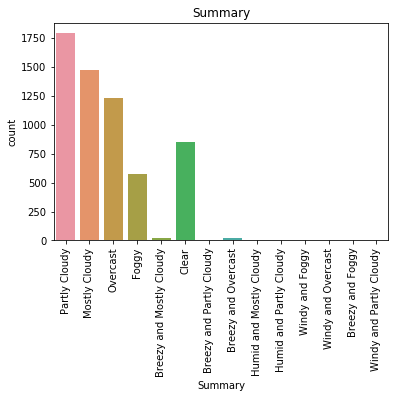

In [0]:
#To plot a counplot for the visualization of column summary
k=sns.countplot(x='Summary',data=df)
k.set_xticklabels(k.get_xticklabels(),rotation=90)
k.set_title("Summary")

####From the plot it is visible that maximum times the weather remains as partly cloudy,mostly cloudy,overcast

([<matplotlib.patches.Wedge at 0x7f1ffc0c9780>,
 [Text(0.7886369354169925, 0.7668453456180683, 'Mostly Cloudy'),
  Text(-0.8683896512248944, 0.6752032387700065, 'Overcast'),
  Text(-0.6653832115436118, -0.8759367453166406, 'Partly Cloudy'),
  Text(0.7756760300546007, -0.7799530090965315, 'Rest')],
 [Text(0.43016560113654134, 0.41827927942803717, '24.6%'),
  Text(-0.473667082486306, 0.3682926756927308, '29.9%'),
  Text(-0.36293629720560644, -0.4777836792636221, '20.5%'),
  Text(0.42309601639341854, -0.42542891405265354, '25.1%')])

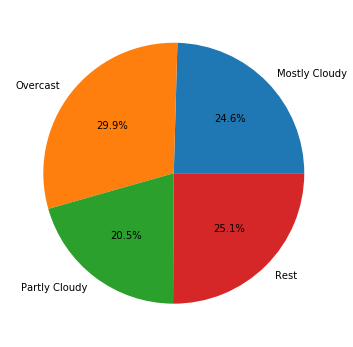

In [0]:
df3=df3.to_frame()
p=df3.query('Summary=="Clear"') 
p2 =df3.query('Summary=="Foggy"')
p3=df3.query('Summary=="Windy and Foggy"') 
p4 =df3.query('Summary=="Windy and Overcast"')
p5=df3.query('Summary=="Windy and Partly Cloudy"') 
p6 =df3.query('Summary=="Humid and Partly Cloudy"')
p7=df3.query('Summary=="Humid and Mostly Cloudy"') 
p8 =df3.query('Summary=="Breezy and Partly Cloudy"')
p9=df3.query('Summary=="Breezy and Overcast"') 
p10 =df3.query('Summary=="Breezy and Mostly Cloudy"')
p11=df3.query('Summary=="Breezy and Foggy"')
p12=df3.query('Summary=="Partly Cloudy"')
p13=df3.query('Summary=="Mostly Cloudy"')
p14=df3.query('Summary=="Overcast"')
p1=p2.sum()+p.sum()+p3.sum()+p4.sum()+p5.sum()+p6.sum()+p7.sum()+p8.sum()+p9.sum()+p10.sum()+p11.sum()
p14=p14.sum()
p12=p12.sum()
p13=p13.sum()
from matplotlib.pyplot import pie, axis, show
df12 = pd.DataFrame({
    'Summary': ['Partly Cloudy', 'Mostly Cloudy', 'Overcast','Rest'],
    'Values': [p14,p13,p12,p1]})
sums = df12.Values.groupby(df12.Summary).sum()
plt.figure(figsize=(28,6))
axis='equal'
pie(sums, labels=sums.index,autopct='%1.1f%%')

####Here We can see that approximate 75% of the Summary consists of only Overacast,Partly Cloudy,Mostly Cloudy.These is because Szeged is a city with a significant rainfall. Even in the driest month there is a lot of rain.


### Precip_Type

In [0]:
#To get the Description about the Precipitation Type 
df['Precip Type'].describe()

count     5999
unique       2
top       rain
freq      4762
Name: Precip Type, dtype: object

####Here we can see that there are only 2 types of unique Values in which rain is top value.

In [0]:
percentage=df['Precip Type'].value_counts()
percent=100*(percentage/df['Precip Type'].value_counts().sum())
percent

rain    79.379897
snow    20.620103
Name: Precip Type, dtype: float64

####Here We can see that approx. 79% times rain happenend and 21% time Snow happenend

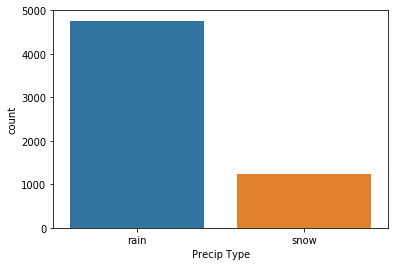

In [0]:
sns.countplot(df['Precip Type'])

####We can see that rain occurs most of Time.

([<matplotlib.patches.Wedge at 0x7f1ffcb29cf8>,
 [Text(-0.877154874750547, 0.6637765630853144, 'Rain'),
  Text(0.8771549058241692, -0.663776522022731, 'Snow')],
 [Text(-0.4784481135002983, 0.36205994350108056, '79.4%'),
  Text(0.4784481304495468, -0.36205992110330776, '20.6%')])

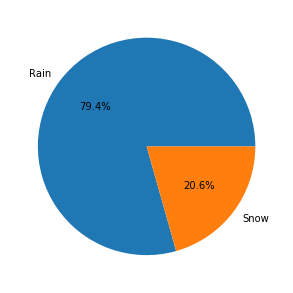

In [0]:
plt.figure(figsize=(10,5))
pie(percent,labels=['Rain','Snow'],autopct='%1.1f%%')


####We conclude that according to the dataset 79.4% time rain happenend and 20.6% times snow happenend

### Temperature (C)

In [0]:
#To get a description about the data
df['Temperature (C)'].describe()

count    5999.000000
mean       10.217695
std        10.565425
min       -14.088889
25%         1.094444
50%        10.050000
75%        18.722222
max        34.005556
Name: Temperature (C), dtype: float64

####So from the above analysis we concluded that the average temperature that was recorded in Szeged is -14 degree celsius and maximum temperature that was recorded in Szeged is 34 degree celsius.

Text(0.5, 1.0, 'Temperature (C)')

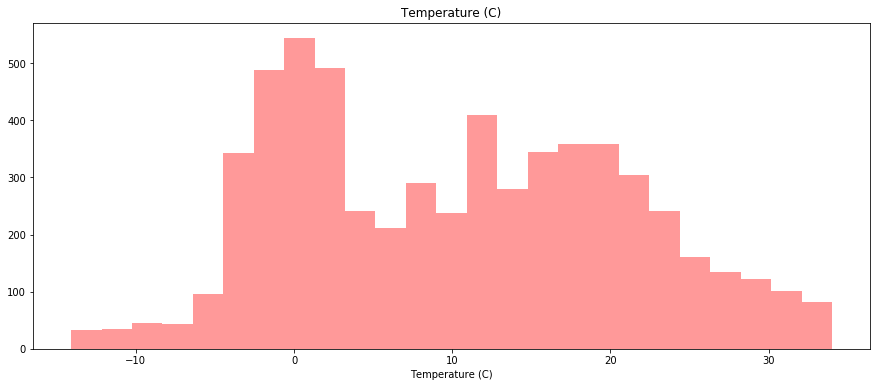

In [0]:
plt.figure(figsize=(15,6))
k=sns.distplot(df['Temperature (C)'],color='red',kde=False)
k.set_title("Temperature (C)")


####In the above plot it is visible that the average temperature that is recorded in Szeged lies in the range of -4 to 4 degree celsius

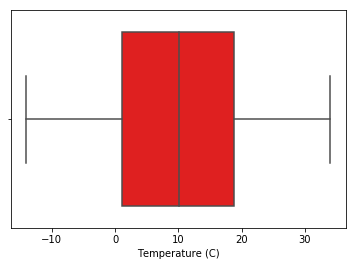

In [0]:
sns.boxplot(df['Temperature (C)'],color="red")

####The plot describes that the median lies somewhere between 10 degree celsius.We can also conclude that there are no ouliers.

### Apparent Temperature (C)

In [0]:
df['Apparent Temperature (C)'].describe()

count    5999.000000
mean        8.958658
std        11.923712
min       -22.094444
25%        -1.538889
50%        10.050000
75%        18.722222
max        36.400000
Name: Apparent Temperature (C), dtype: float64

####From the above analysis we can see that the minimum apparent Temperature that has been calculated in Szeged is -22 degree celsius that is less than the actual temperature and maximum Apparent temperature that has been calculated is 36 degrees celsius that also less than the maximum temperature recorded.This is because of the fact as Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed. The measure is most commonly applied to the perceived outdoor temperature.

Text(0.5, 1.0, 'Apparent Temperature (C)')

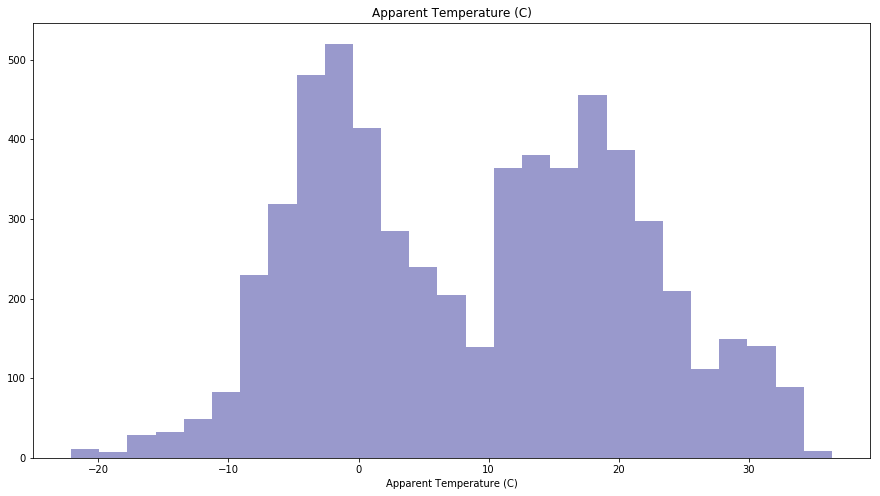

In [0]:
plt.figure(figsize=(15,8))
k1=sns.distplot(df['Apparent Temperature (C)'],kde=False,color='navy')
k1.set_title("Apparent Temperature (C)")

####By looking at the above plot we can conclude that maximum times apparent temperature ranges between -4 to 4  degree celsius. 

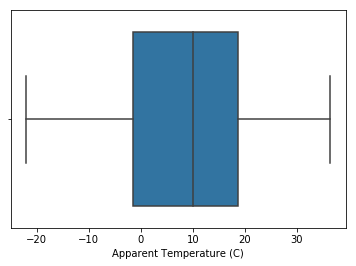

In [0]:
sns.boxplot(df['Apparent Temperature (C)'])

####Here also we can see that median of Apparent Temperature and Temperature are nearly equal.We can also conclude that there is no ouliers


### Humidity

In [0]:
df['Humidity']=df['Humidity']*100

####converted humidity to percentage for more understanding

In [0]:
df['Humidity'].describe()

count    5999.000000
mean       77.948825
std        17.305135
min        27.000000
25%        68.000000
50%        83.000000
75%        92.000000
max       100.000000
Name: Humidity, dtype: float64

####we can conclude from the above graph that minimum Humidity percentage that has been recorded is 27 % whereas maximum percentage that has calculated is 100 %. percent that  means that the air is totally saturated with water vapor and cannot hold any more, creating the possibility of rain.

Text(0.5, 1.0, 'Humidity')

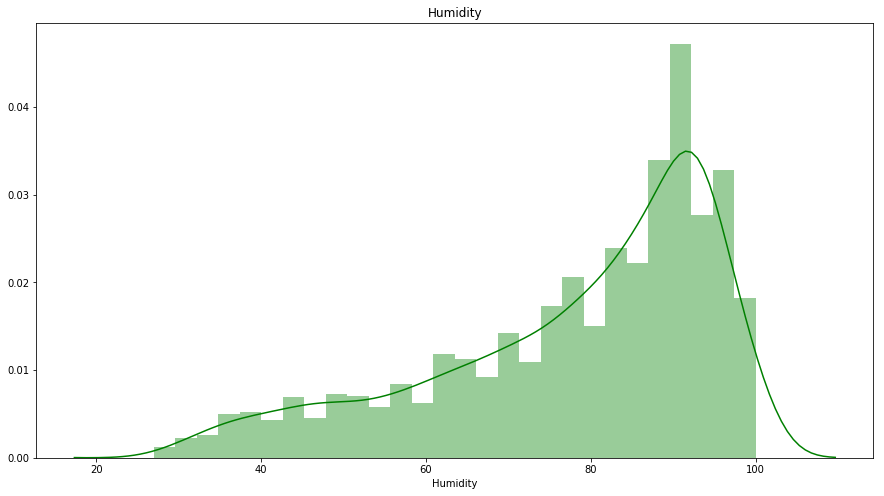

In [0]:
plt.figure(figsize=(15,8))
k=sns.distplot(df['Humidity'],color="green")
k.set_title("Humidity")

####It is visible from the graph that Humidity remains in the range of 85 to 95 percent most of the times.

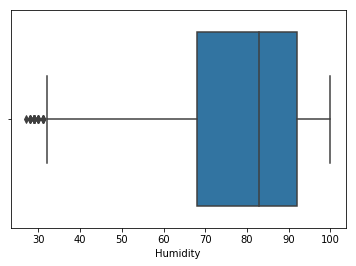

In [0]:
#creating boxplot for the Humidity
sns.boxplot(df['Humidity'])

####We can see from the plot the median lies nearly to 82 % .Here we can observe that there are outliers which are affecting the mean value.We can also conclude that almost 66 % of data is less than 84 % of humidity.

###Wind Speed (km/h)

In [0]:
df['Wind Speed (km/h)'].describe()

count    5999.000000
mean       10.007362
std         6.536619
min         0.000000
25%         4.878300
50%         9.064300
75%        13.395200
max        45.933300
Name: Wind Speed (km/h), dtype: float64

####From the above plot we can say that maximum wind speed that has been recorded in Szeged is 45 km/h and minimum which has been recorded is 0 km/h .Wind speed can be zero (calm). Properly calibrated anemometer / anemograph can measure calm and that this data is considered as acceptable.

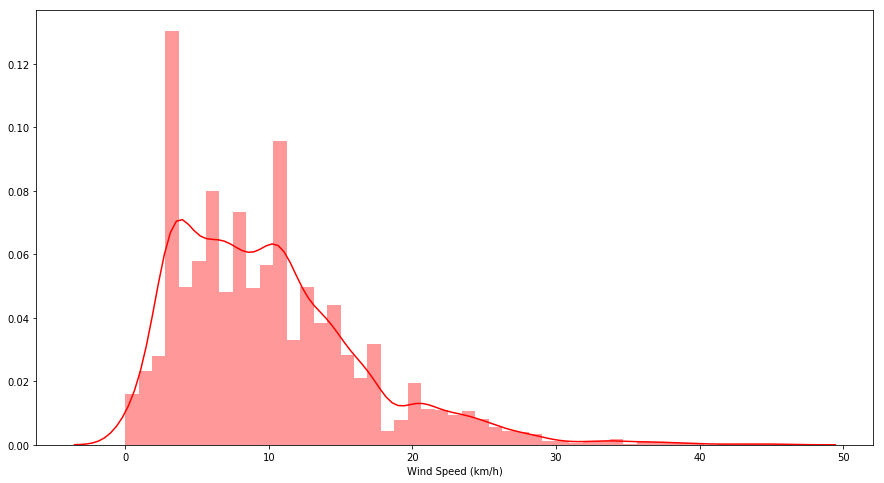

In [0]:
plt.figure(figsize=(15,8))
sns.distplot(df['Wind Speed (km/h)'],color='red')

####We can predict that average wind speed (km/h) remains in the range of 4 to 12 km/h whereas it looks it is minimum in the range of 18 to 45 km/h

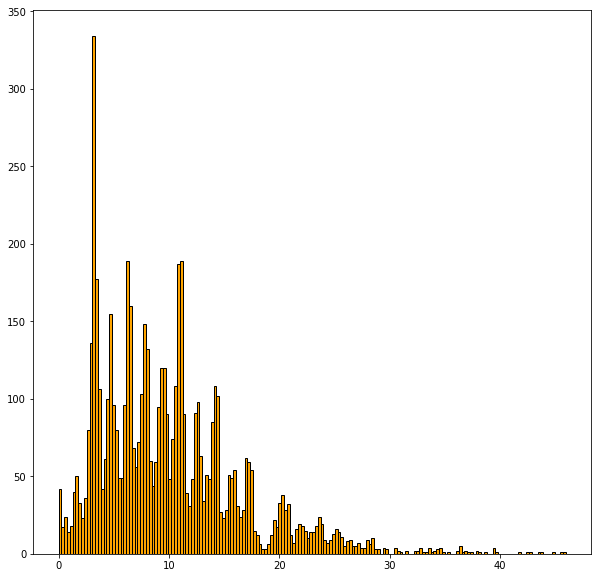

In [0]:
plt.subplots(figsize=(10,10))
plt.hist(df['Wind Speed (km/h)'], bins = 180,color = 'orange', edgecolor = 'black')
plt.show()

####We can say that wind speed (km/h)nearly lies between 4 to 12 km/h

### Wind Bearing (degrees)

In [0]:
#here we converted degress into direction for better understanding
df6=df['Wind Bearing (degrees)']/22.5+.5
arr=["N","NE","E", "SE","S","SW","W","NW"]
df6=df6.astype(int)
for i in range(len(df6)):
  df6.iloc[i]=arr[(df6.iloc[i])%8]
df6=df6.to_frame()


In [0]:
#To get a brief description about Wind Bearing
df6.describe()

,Wind Bearing (degrees)
count,5999
unique,8
top,NW
freq,1072


####In the above analysis we can see that NW direction has most times wind direction that is 1072 times

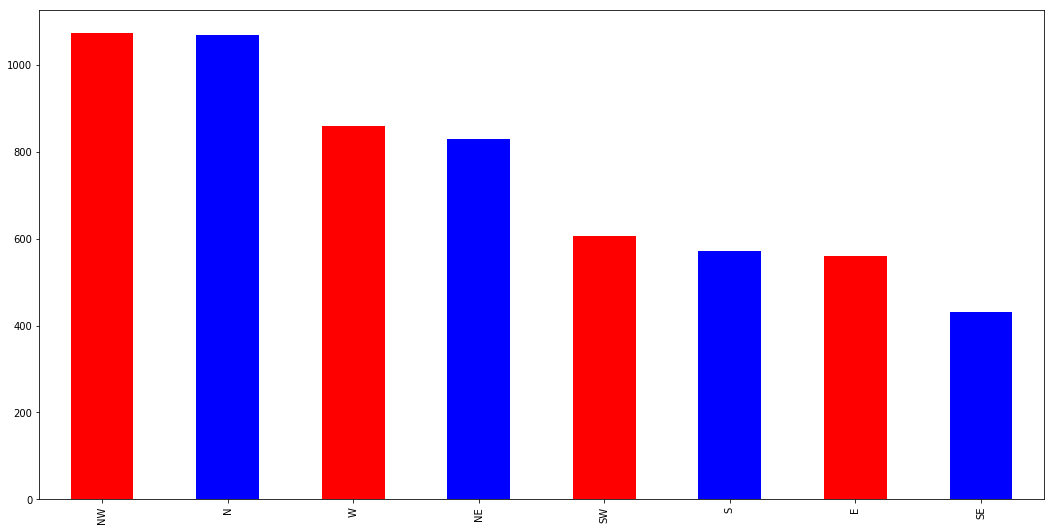

In [0]:
#To plot a count plot for checking the distribution 
plt.figure(figsize=(18,9))
df6['Wind Bearing (degrees)'].value_counts().plot.bar(color=('red','blue'))

####From the above graph we can see that North West,North ,West direction constitutes major direction of speed in Szeged

### Visibility (km)

In [0]:
df['Visibility (km)'].describe()

count    5999.000000
mean        9.476875
std         4.038583
min         0.000000
25%         6.906900
50%         9.982000
75%        11.270000
max        16.100000
Name: Visibility (km), dtype: float64

####Here it can be stated that maximum visibility that has been recorded is 16 km approx. whereas minimum visibiltiy that has been calculated is 0 km.Visibility of less than 100 metres (330 ft) is usually reported as zero. In these conditions, roads may be closed, or automatic warning lights and signs may be activated to warn drivers. These have been put in place in certain areas that are subject to repeatedly low visibility, particularly after traffic collisions or pile-ups involving multiple vehicles.A visibility reduction is probably the most apparent symptom of air pollution. Visibility degradation is caused by the absorption and scattering of light by particles and gases in the atmosphere. Absorption of electromagnetic radiation by gases and particles is sometimes the cause of discolorations in the atmosphere but usually does not contribute very significantly to visibility degradation

Text(0.5, 1.0, 'Visibility (km)')

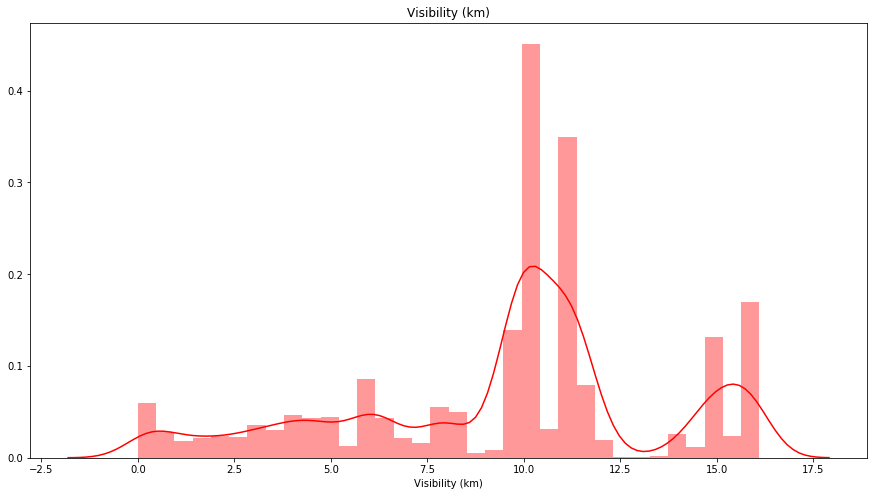

In [0]:
plt.figure(figsize=(15,8))
k=sns.distplot(df['Visibility (km)'],color='red')
k.set_title('Visibility (km)')

####Here it can be noted that usuallly Visibility remains nearly equal to 10 to 12.5 km

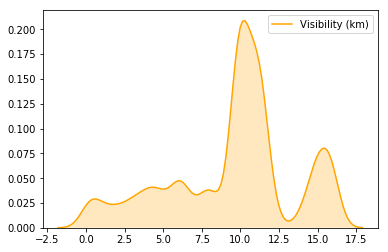

In [0]:
sns.kdeplot(df['Visibility (km)'],shade=True,color='orange')

####This graph also says that maximum times  visibility remains between 10 and  12.5


### Pressure (millibars)

In [0]:
df['Pressure (millibars)'].describe()

count    5999.000000
mean      997.359828
std       145.173638
min         0.000000
25%      1012.060000
50%      1016.840000
75%      1022.490000
max      1045.140000
Name: Pressure (millibars), dtype: float64

####Here we can see that the minimum pressure here comes out to be 0 millibars which is not possible.When Pressure outside falls too low, the fluids in our body (Blood) have a higher pressure than outside’s pressure. So we know it well that fluid flows from high to Low pressure zone, now you can visualize all the blood coming out of every vein and blood vessel in our body.

####Due to that much low pressure lungs will expand to large and can give lethal damage, every part of body that will have flowing substance of high pressure will try to come out.
####In order to make our data preserve we will fill the value 0 millibars with the mean which is 997.35

In [0]:
df['Pressure1 (millibars)']=df['Pressure (millibars)'].replace(0.0,997.35)                                                            

In [0]:
df['Pressure1 (millibars)'].describe()

count    5999.000000
mean     1017.975164
std         9.261947
min       996.240000
25%      1012.060000
50%      1016.840000
75%      1022.490000
max      1045.140000
Name: Pressure1 (millibars), dtype: float64

####Now we can see that after updation the minimum pressure becomes 1017 millibars whereas maximum pressure remains the same.

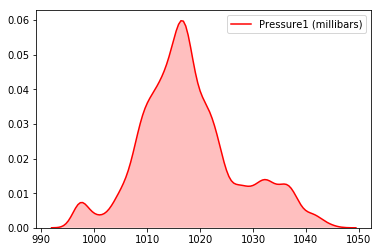

In [0]:
sns.kdeplot(df['Pressure1 (millibars)'],color='red',shade=True)

####Here we can say that maximum times the Pressure remains at nearly 1002 to 1027 millibars.

###	Daily Summary

In [0]:
#To get a description about the column Daily summary.
df['Daily Summary'].describe()

count                                  5999
unique                                   58
top       Mostly cloudy throughout the day.
freq                                    600
Name: Daily Summary, dtype: object

####Here we can see that that there are 58 unique values and maximum frequency is of Mostly cloudy throughout the day.

####To count the number of times a value has appeared in column Daily Summary.

In [0]:
df3=df.groupby('Daily Summary').size()
print(df3)

Daily Summary
Breezy starting overnight continuing until afternoon and foggy starting in the morning continuing until evening.     24
Clear throughout the day.                                                                                            24
Foggy in the evening.                                                                                                24
Foggy in the morning and breezy starting in the afternoon continuing until night.                                    24
Foggy in the morning.                                                                                               288
Foggy overnight and breezy in the morning.                                                                           24
Foggy overnight.                                                                                                     72
Foggy starting in the afternoon continuing until evening.                                                            48
Foggy starting in the afte

####So we can see that that most of times the weather is Partly cloudy until night and Mostly cloudy until night 

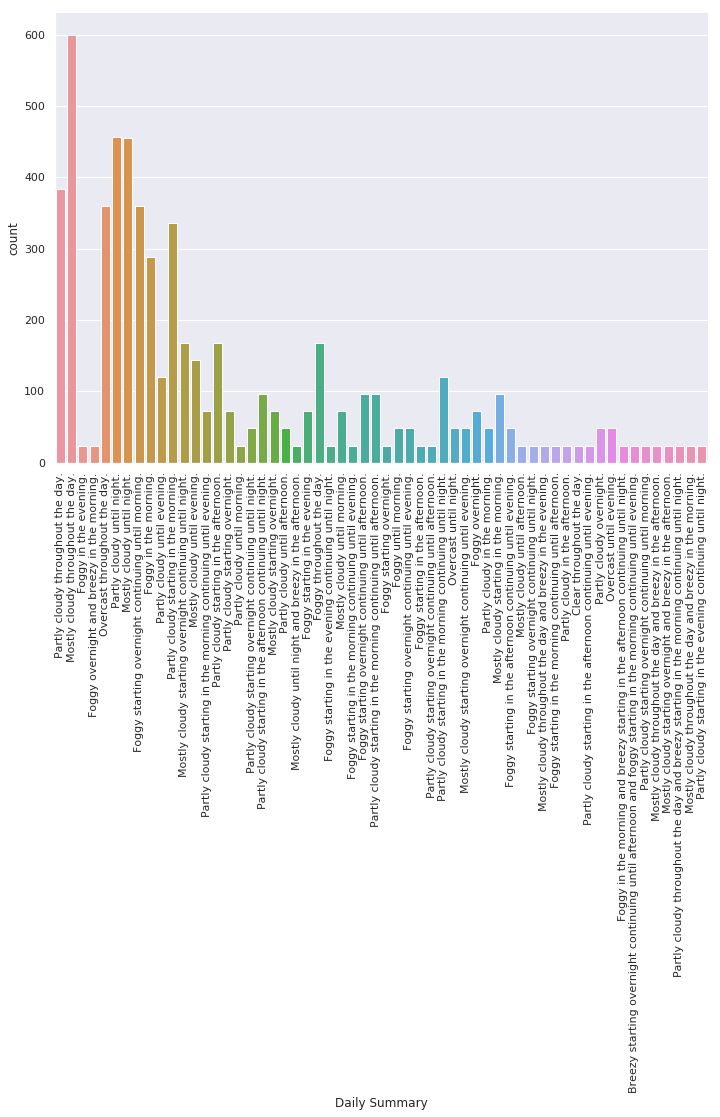

In [0]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
k=sns.countplot(x='Daily Summary',data=df)
k.set_xticklabels(k.get_xticklabels(),rotation=90)
sns.despine()

####So we can see that that most of times the weather is Partly cloudy until night and Mostly cloudy until night and Mostly cloudy throughout the day

## Bivariate Analysis

###Correlation between the variables.

In [0]:
c=df.corr()
c

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992881,-0.564260,-0.053935,0.044263,0.432098,-0.080315
Apparent Temperature (C),0.992881,1.000000,-0.535399,-0.126701,0.055151,0.422888,-0.077491
Humidity,-0.564260,-0.535399,1.000000,-0.209529,0.041205,-0.343168,0.061836
Wind Speed (km/h),-0.053935,-0.126701,-0.209529,1.000000,-0.068218,0.078624,-0.043172
Wind Bearing (degrees),0.044263,0.055151,0.041205,-0.068218,1.000000,0.016963,-0.052019
Visibility (km),0.432098,0.422888,-0.343168,0.078624,0.016963,1.000000,-0.038036
Pressure (millibars),-0.080315,-0.077491,0.061836,-0.043172,-0.052019,-0.038036,1.000000


####Lets plot it into a heatmap

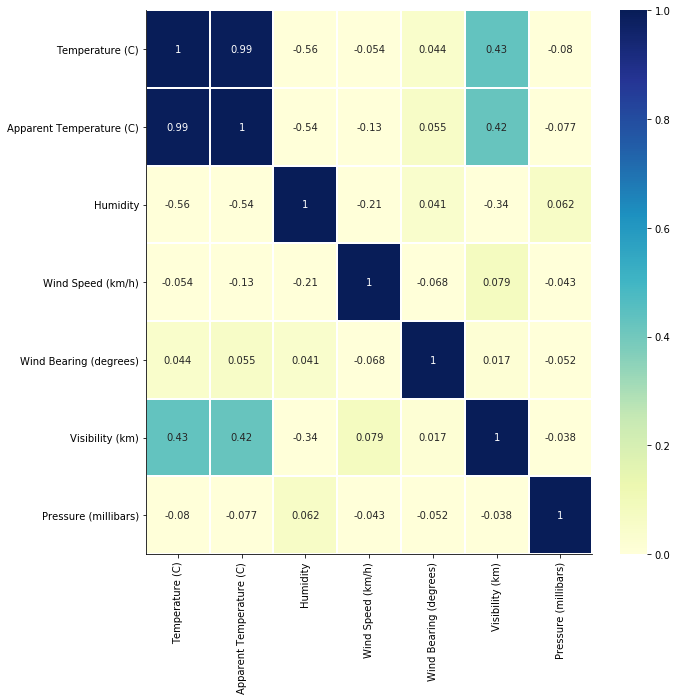

In [0]:
plt.subplots(figsize=(10,10)),
sns.heatmap(c, vmin=0, vmax=1,annot=True, cmap="YlGnBu", linewidth=1)
sns.despine()

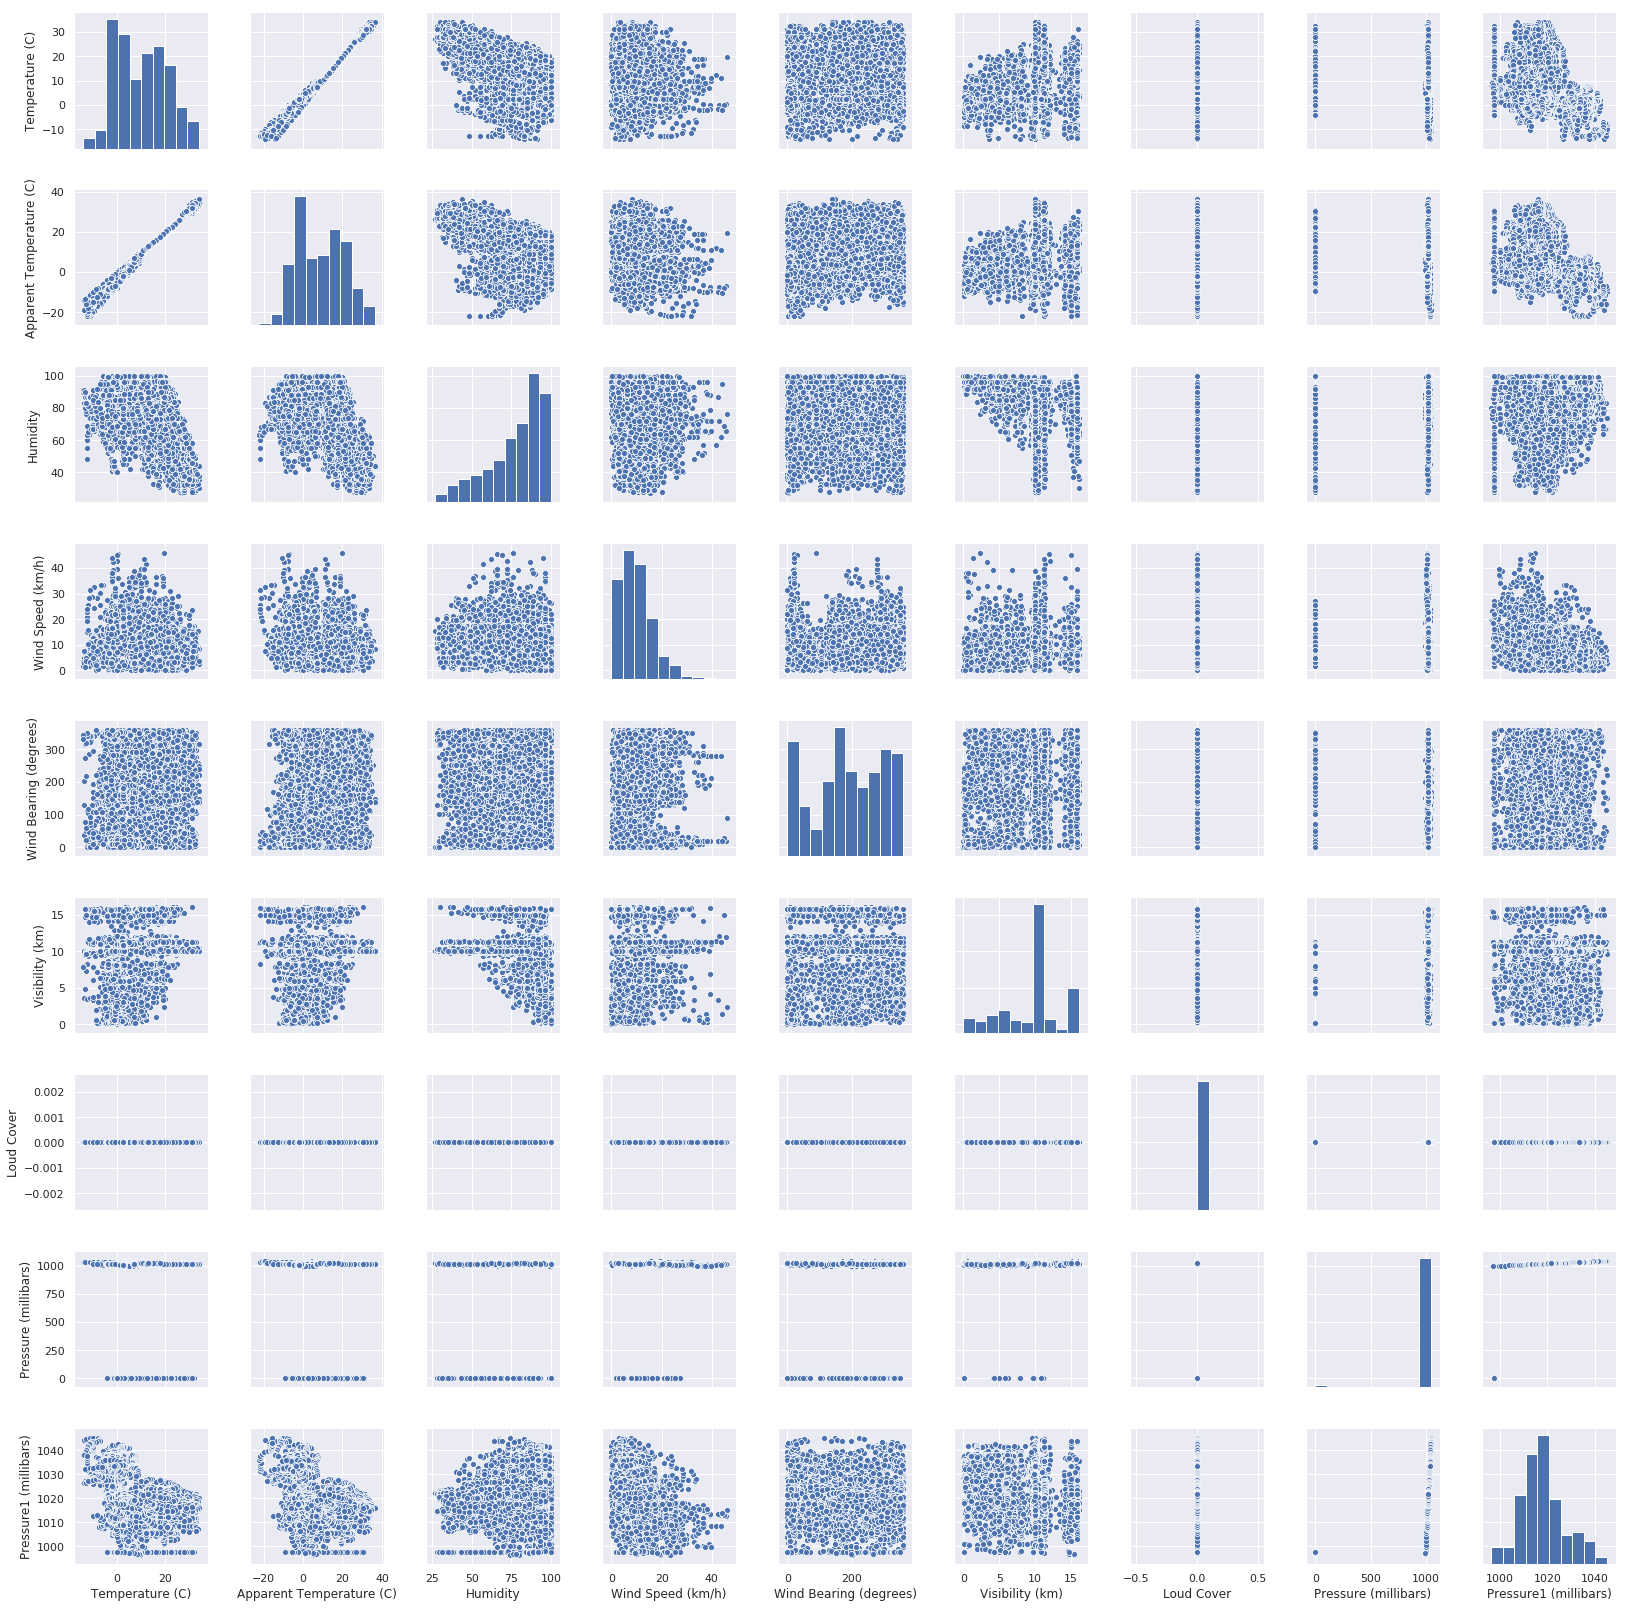

In [0]:
sns.pairplot(df)

####Here we can see that there is a high correlation between Temperature and apparent temperature.It can be also seen that there is a good correlation of Visibility with Temperature and Apparent Temperature.Here we have also seen the negative correlation.Negative correlation is a relationship between two variables in which one variable increases as the other decreases, and vice versa.So we can plot graph for:
####1. Temperature and Apparent Temperature
####2. Visibility and Apparent Temperature
####3. Apparent Temperature and Humidity.
####4. Apparent Temperature and Wind Speed.
####5 .Temperature and Humidity.
####6.Wind speed and Wind Bearing.
####7 .Month and Apparent Temperature.

###1.Temperature and Apparent Temperature

In [0]:
df[['Temperature (C)','Apparent Temperature (C)']].describe()

,Temperature (C),Apparent Temperature (C)
count,5999.000000,5999.000000
mean,10.217695,8.958658
std,10.565425,11.923712
min,-14.088889,-22.094444
25%,1.094444,-1.538889
50%,10.050000,10.050000
75%,18.722222,18.722222
max,34.005556,36.400000


####Here we can see that there is not lot of diffrence int the mean,min,max of Temperature and Apparent Temperature.

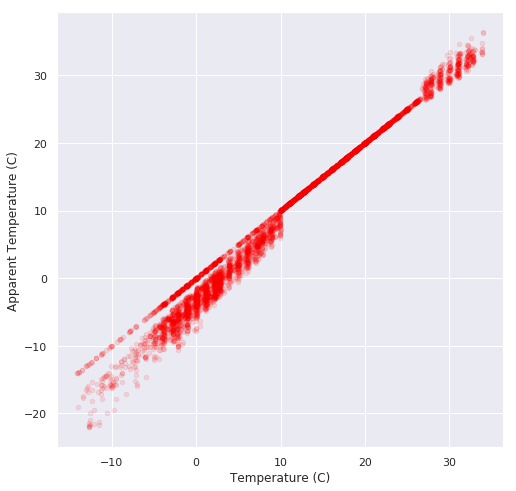

In [0]:
df.plot.scatter(x='Temperature (C)',y='Apparent Temperature (C)',alpha=0.1,figsize=(8,8),color='red')

####In this plot we can see that there is linear dependency in the temperature and apparent Temperature and also we can analyse that if Temperature increases then Apparent Temperature also increases.

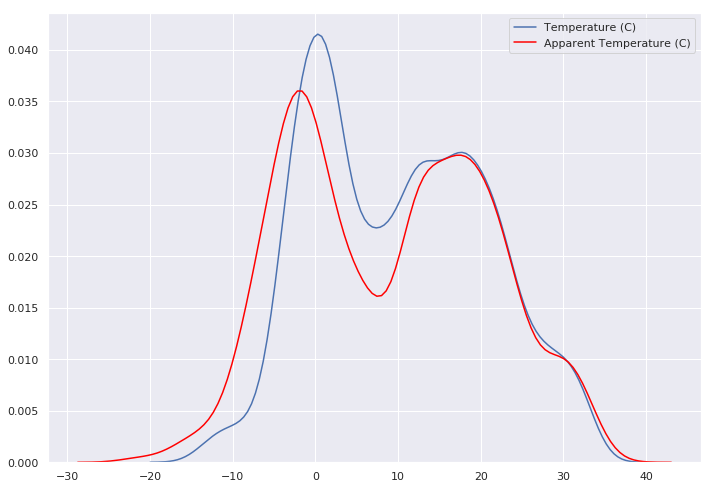

In [0]:
sns.kdeplot(data=df['Temperature (C)'])
sns.kdeplot(data=df['Apparent Temperature (C)'],color='red')
plt.legend()

####Here we can see that apparent temperature and temperature doesn't have much difference.

### Visibility and Apparent Temperature (C)

In [0]:
df[['Visibility (km)','Apparent Temperature (C)']].describe()

,Visibility (km),Apparent Temperature (C)
count,5999.000000,5999.000000
mean,9.476875,8.958658
std,4.038583,11.923712
min,0.000000,-22.094444
25%,6.906900,-1.538889
50%,9.982000,10.050000
75%,11.270000,18.722222
max,16.100000,36.400000


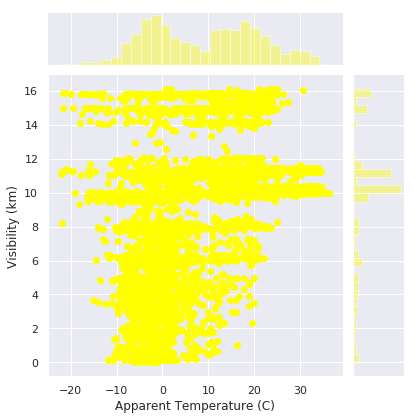

In [0]:
sns.jointplot(x='Apparent Temperature (C)',y='Visibility (km)',data=df,color='yellow')

####Here we are not able to say any Relationship so we will conclude that there is no much affect of apparent temperature to visibility

###Apparent Temperature (C) and Humidity.

In [0]:
df[['Humidity','Apparent Temperature (C)']].describe()

,Humidity,Apparent Temperature (C)
count,5999.000000,5999.000000
mean,77.948825,8.958658
std,17.305135,11.923712
min,27.000000,-22.094444
25%,68.000000,-1.538889
50%,83.000000,10.050000
75%,92.000000,18.722222
max,100.000000,36.400000


<Figure size 1800x720 with 0 Axes>

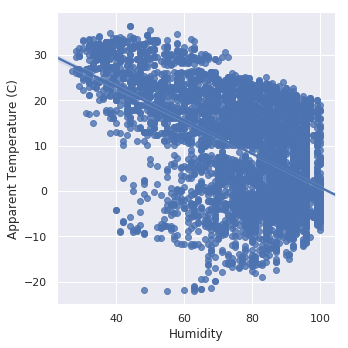

In [0]:
plt.figure(figsize=(25,10))
sns.lmplot(x='Humidity',y='Apparent Temperature (C)',data =df)

####We can analyse from the above plot that with increase in the Humidity ,Apparent temperature decreases.Because warm air can hold more water vapor than cool air, relative humidity falls when the temperature rises if no moisture is added to the air.

###Wind Speed (km/h) and apparent Temperature (C)

In [0]:
df[['Wind Speed (km/h)','Apparent Temperature (C)']].describe()

,Wind Speed (km/h),Apparent Temperature (C)
count,5999.000000,5999.000000
mean,10.007362,8.958658
std,6.536619,11.923712
min,0.000000,-22.094444
25%,4.878300,-1.538889
50%,9.064300,10.050000
75%,13.395200,18.722222
max,45.933300,36.400000


<Figure size 1800x720 with 0 Axes>

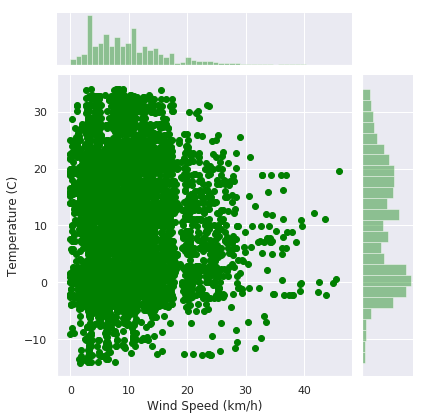

In [0]:
plt.figure(figsize=(25,10))
sns.jointplot(x='Wind Speed (km/h)',y='Temperature (C)',data =df,color='green')

####Here also we are not able to see any specific relationship

###Temperature and Humidity.

In [0]:
df[['Humidity','Temperature (C)']].describe()

,Humidity,Temperature (C)
count,5999.000000,5999.000000
mean,77.948825,10.217695
std,17.305135,10.565425
min,27.000000,-14.088889
25%,68.000000,1.094444
50%,83.000000,10.050000
75%,92.000000,18.722222
max,100.000000,34.005556


<Figure size 1800x720 with 0 Axes>

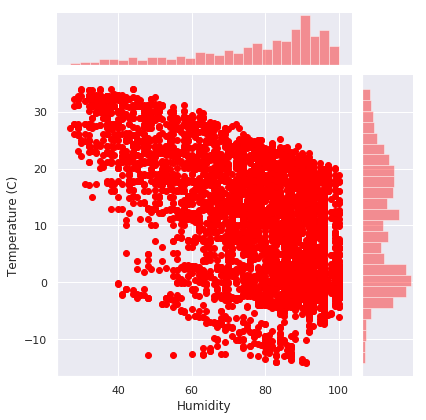

In [0]:
plt.figure(figsize=(25,10))
sns.jointplot(x='Humidity',y='Temperature (C)',data =df,color='red')

####Here also we can see a negative relationship which means if temperature increases Humidity decreases.

###Wind speed and Wind Bearing.

In [0]:
df[['Wind Bearing (degrees)','Wind Speed (km/h)']].describe()

,Wind Bearing (degrees),Wind Speed (km/h)
count,5999.000000,5999.000000
mean,190.349558,10.007362
std,107.026792,6.536619
min,0.000000,0.000000
25%,122.000000,4.878300
50%,190.000000,9.064300
75%,287.000000,13.395200
max,359.000000,45.933300


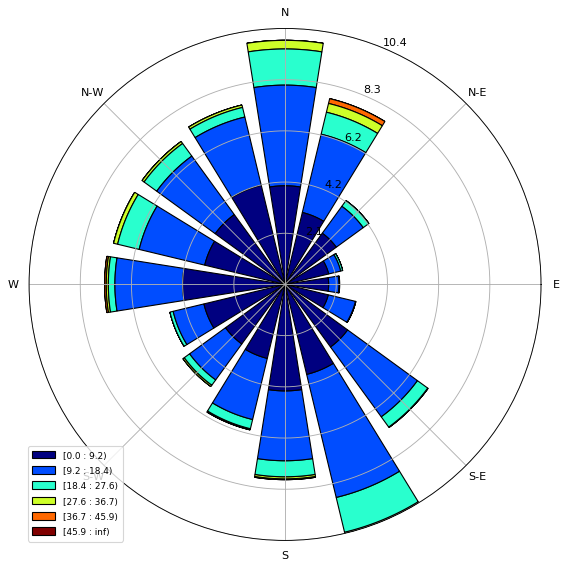

In [0]:
ax = WindroseAxes.from_ax()
ax.bar(df['Wind Bearing (degrees)'], df['Wind Speed (km/h)'], normed=True, opening=0.8, edgecolor='black')
ax.set_legend()

#### This graph shows the wind direction in szeged for example towards north in Szeged wind blows approximate 10 % times from the total percentage.
#### in which upto 4.2 % times it blows with the speed of 0 to 9.2 km/h
#### and upto 4.1 % approximate it blows with the speed of 9.2 to 18.4 km/h
#### and upto 1.3 % times it blows with the speed of 18.4 to 27.6 km/h
#### and upto 0.5% times it blows with the speed of 27.6 to 36.7 km/h
#### It can be understood from the graph that only in one direction that is NW it has orange part which means maximum speed which 45.9 km/h.
#### We can also understand the wind blows between S and SE maximum times.

###Month and Apparent Temperature.

In [0]:
from datetime import datetime
df['Formatted Date']=pd.to_datetime(df['Formatted Date'],utc=True)
df['Formatted Date'] = df['Formatted Date'].astype(str).str[:-6]
m=pd.to_datetime(df['Formatted Date'])
df['Year']=m.dt.year
df['Month']=m.dt.month
df.groupby(['Year','Month'])['Apparent Temperature (C)'].mean()

Year  Month
2005  12       -4.050000
2006  1        -4.173708
      2        -2.990716
      3         1.969780
      4        12.098827
      5        14.731448
      6        19.535965
      7        23.595348
      8        19.541944
      11        5.416667
      12        0.113205
Name: Apparent Temperature (C), dtype: float64

####Here we can see that in 2006 in January,the apparent temperature mean was calculated as lowest which was -4.17 degree celsius,whereas in July 2006 it was calculated as maximum which was equal to  23 degress celsius

<BarContainer object of 5999 artists>

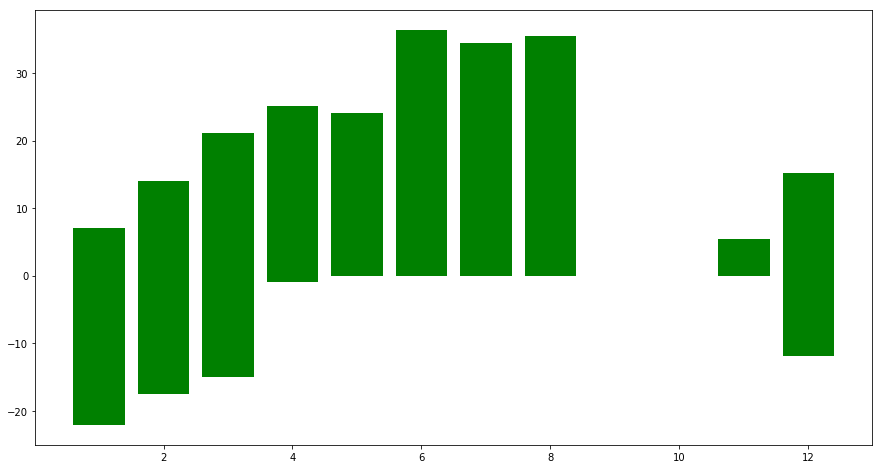

In [0]:
plt.figure(figsize=(15,8))
plt.bar(df['Month'],df['Apparent Temperature (C)'],color='green')

####Here we can see that in the january lowest Apparent temperature is calculated whereas in June maximum apparent temperature is calculated

###MultiVariate Analysis

####1.Precip_type and Summary And Apparent Temperature.

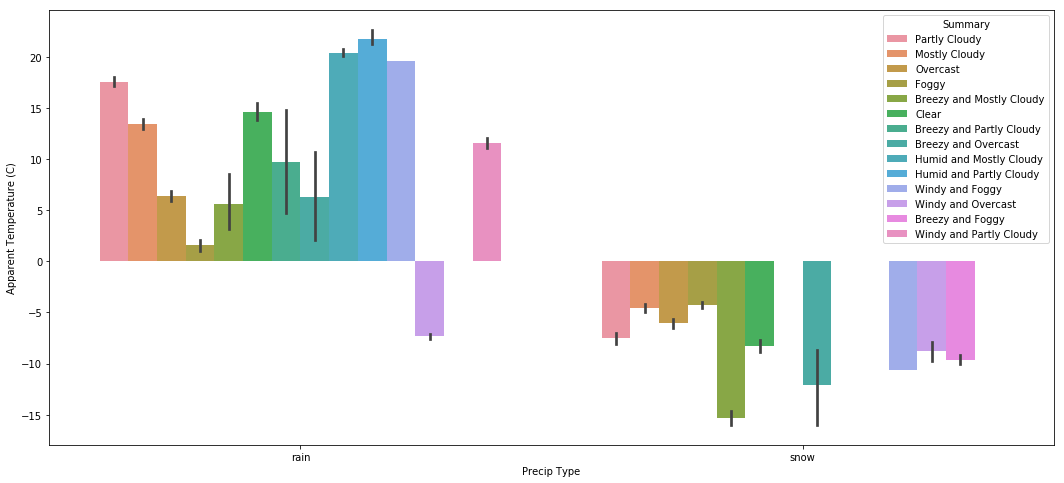

In [0]:
plt.figure(figsize=(18,8))
sns.barplot(x='Precip Type',y='Apparent Temperature (C)',hue='Summary',data=df)

####It can be stated that usually in snow times apparent temperature is less than 0 (C).

###Humidity and Precip Type and Apparent Temperature.

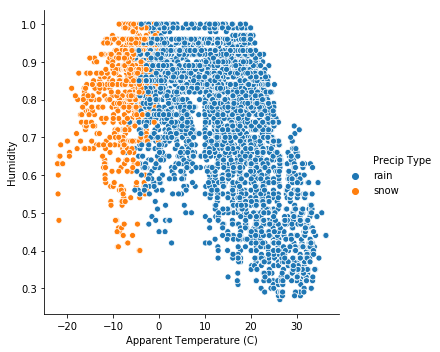

In [0]:
sns.relplot(x='Apparent Temperature (C)',y='Humidity',hue='Precip Type',data=df)

####It can be concluded from the above graph that when the apparent temperature is high then humidity gets lower down whereas during low temperature humidity is high and most of times when apparent temperature is low ,the form of precipitation is snow.

###Humidity and apparent temperature and Summary and Precip type

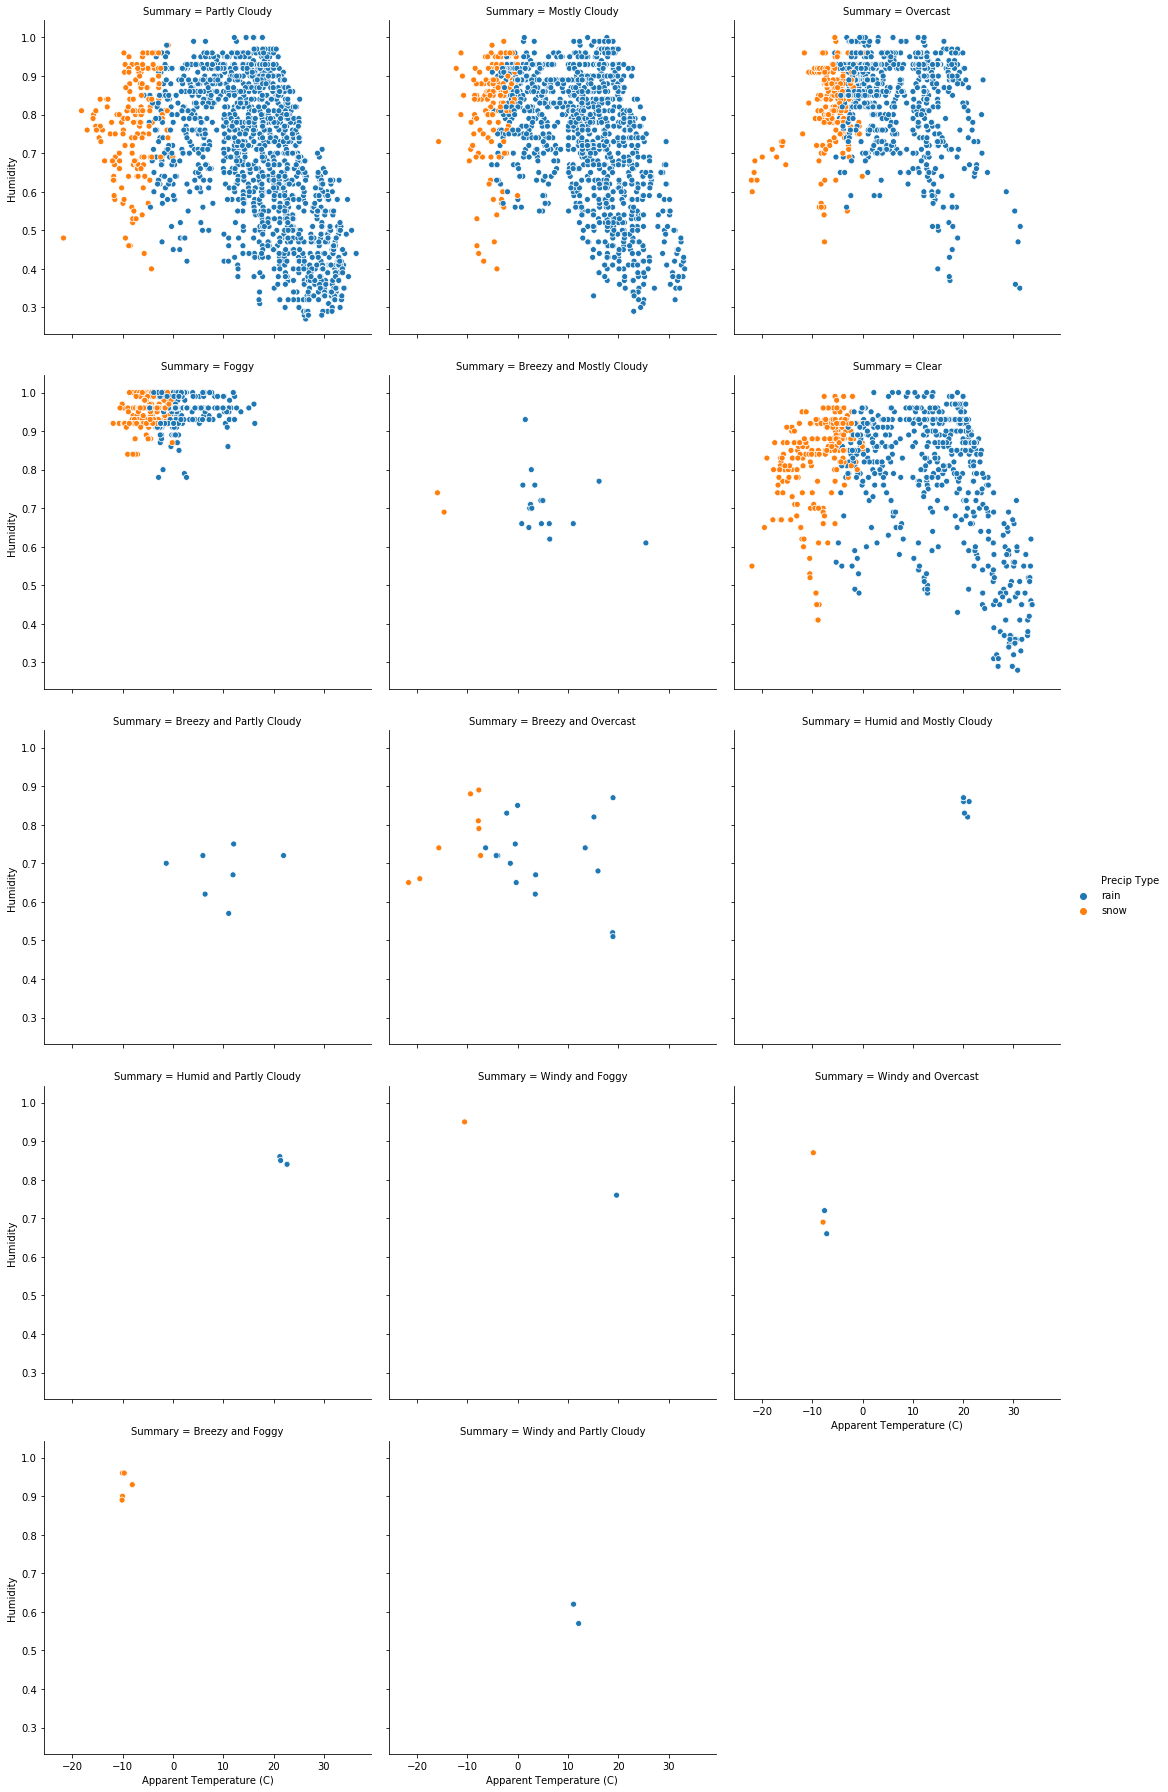

In [0]:
sns.relplot(x='Apparent Temperature (C)',y='Humidity',hue='Precip Type',col='Summary',col_wrap=3,data=df);

###Apparent Temperature (C) and Wind Speed (km/h) and Precip Type and Summary

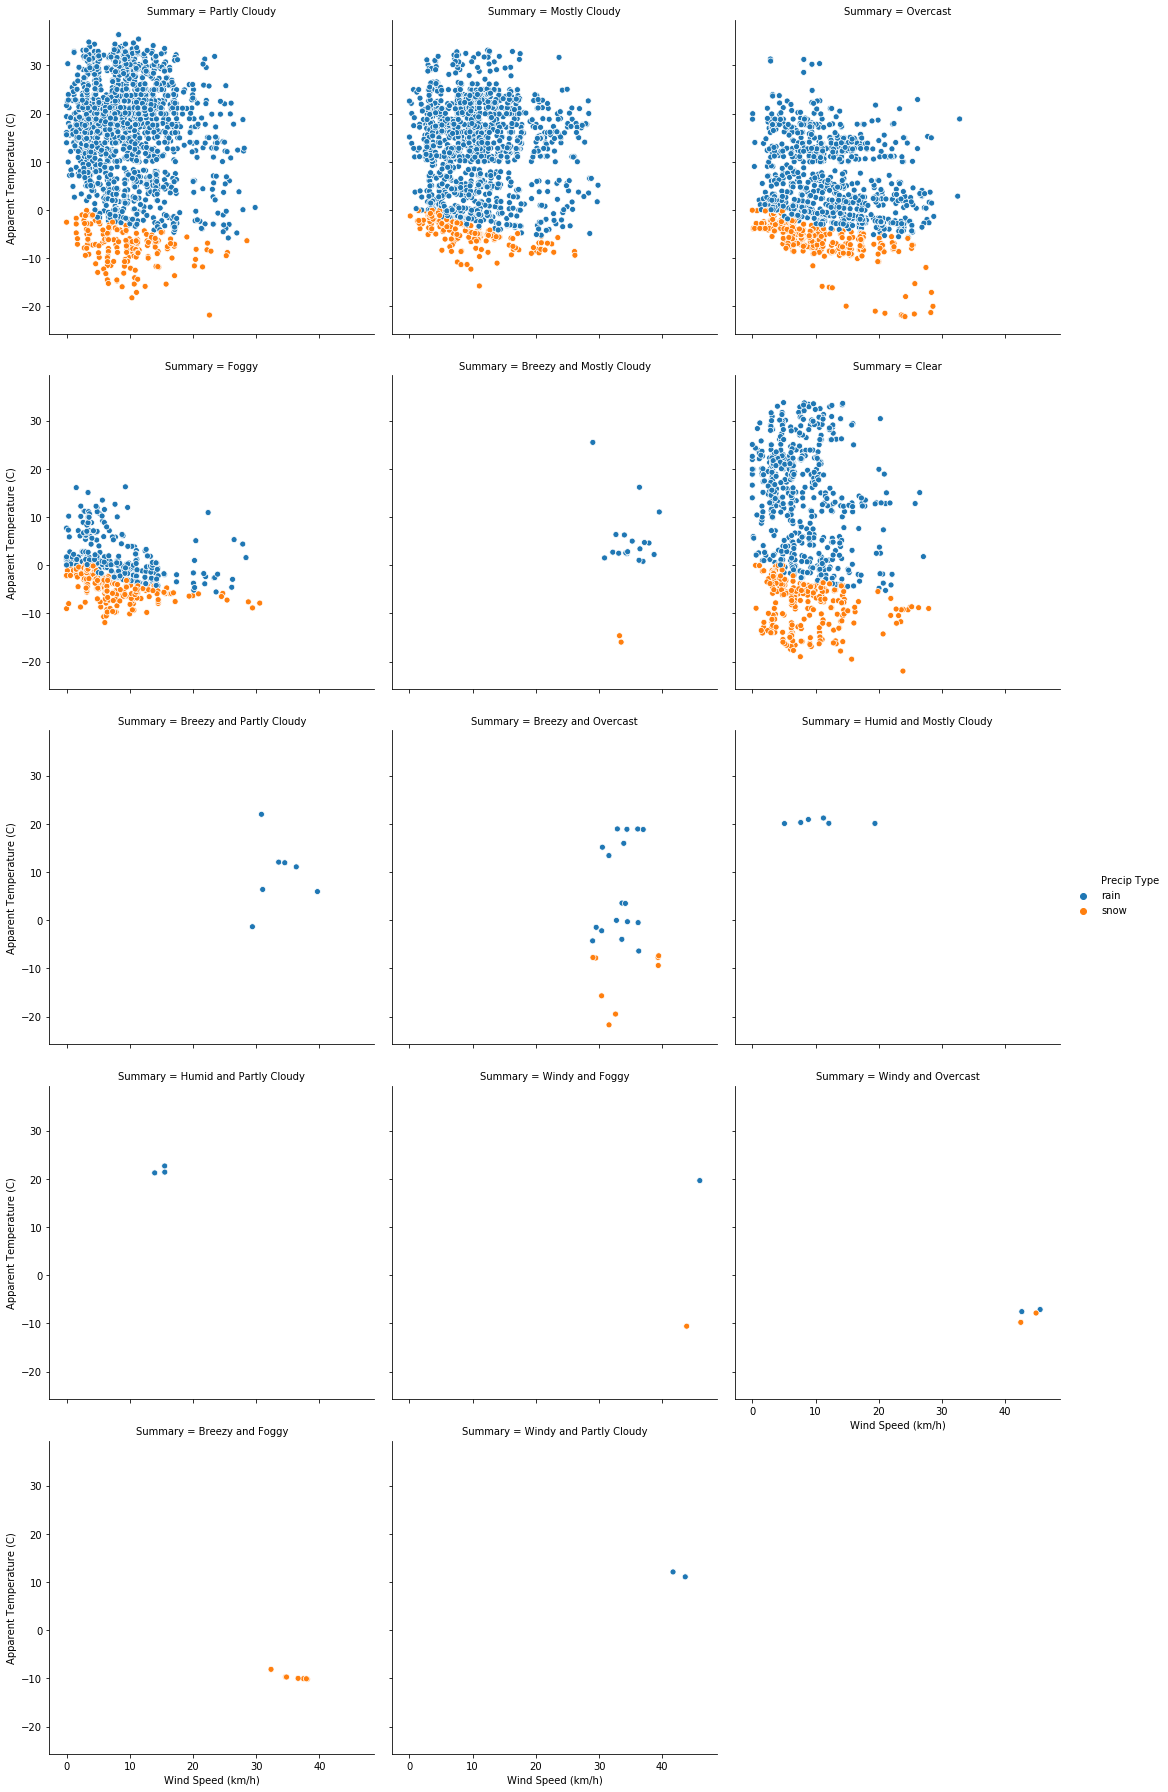

In [0]:
sns.relplot(y='Apparent Temperature (C)',x='Wind Speed (km/h)',hue='Precip Type',col='Summary',col_wrap=3,data=df);

####It can be concluded from the above graph that when the apparent temperature is high then humidity gets lower down whereas during low apparent temperature humidity is high and most of times when apparent temperature is low ,the form of precipitation is snow.

###Conclusion

####Lets see from the above analysis which variables mainly affect the variables Apparent Temperature (C):
####1.Temperature :
Temperature (C) is lineraly dependent to Apparent Temperature (C) as this means that if Temperature of Szeged increases corresponding to that Apparent Temperature (C) also increases.

####2.Humidity :
Humidity is inversely dependent to Apparent Temperature (C) as this means that if Humidity of Szeged increases corresponding to that Apparent Temperature (C) also decreases. In humid conditions,the air feels much hotter because less perspiration evaporates frm the skin.

####3.Precip Type:
Apparnent Temperature (C) also depends on Precipitation Type as if there is rain in Szeged then according to our analysis the apparent Temperature of Szeged will be mostly greater then zero whereas  if there is Snow in Szeged then according to our analysis the apparent Temperature of Szeged will be mostly lesser then zero.

####4.Month:
Month also pays a key factor for the Apparent Temperature (C) in Szeged as according to our dataset if there is months from November to March which is approximately 4 months, the apparent Temperature (C) in Szeged is not able to cross double digits whereas if there is months fromApril to August which is approximately 4 months, the apparent Temperature (C) in Szeged is High.


#####Now let us look up on other variables how they affect on Apparent Temperature (C):
![ ](https://github.com/Akshay2224/Apparent-Temperature/blob/master/summ.jpg?raw=1)